#### Name: Paras Karki<br>Student No.: 2050210<br>Group: L6CG6

<h1><i>Classification Task</i><h1>

### Portfolio-I

<b>Import libraries and load dataset

In [148]:
import numpy as np  # linear algebra
import pandas as pd # csv file, data processing
df=pd.read_csv("drug200.csv")

In [69]:
df.head() #print first five columns

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [70]:
df.Drug.unique() #print unique values of a column

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


The dataset is multi class classification. The dataset contains numerical and cateogorical string datas. The column 'Drug' is target variable and other column are input variable.

<b>Data Visualization

In [11]:
df.groupby('Drug').mean()

,Age,Na_to_K
Drug,,
DrugY,43.747253,22.374780
drugA,35.869565,10.918783
drugB,62.500000,11.524375
drugC,42.500000,10.633750
drugX,44.018519,10.650556


Text(0.5, 1.0, 'Distribution of Age')

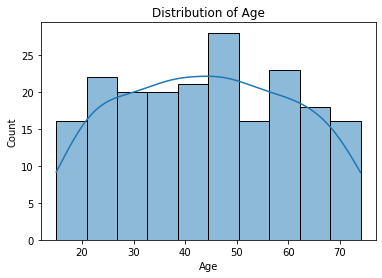

In [26]:
import seaborn as sns
sns.histplot(data=df,x="Age",bins=10,kde=True,palette='Set10')
plt.title(f"Distribution of {'Age'}")

Text(0.5, 1.0, 'Distribution of Na_to_K')

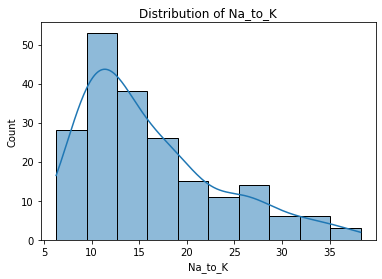

In [28]:
sns.histplot(data=df,x="Na_to_K",bins=10,kde=True,palette='Set10')
plt.title(f"Distribution of {'Na_to_K'}")

Age is distributed uniformally but Na_to_K is not. This can be fixed by using log-transform done below. 

Text(0.5, 1.0, 'Distribution of Na_to_K')

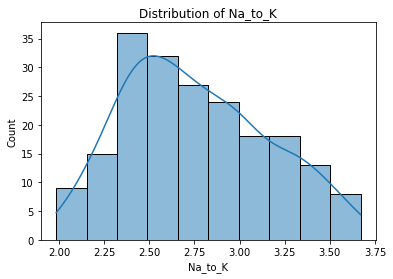

In [106]:
df['Na_to_K']=np.log1p(df['Na_to_K']) #log-transform
sns.histplot(data=df,x="Na_to_K",bins=10,kde=True,palette='Set10')
plt.title(f"Distribution of {'Na_to_K'}")

Now, Na_to_K is also distributed quiet unformally.

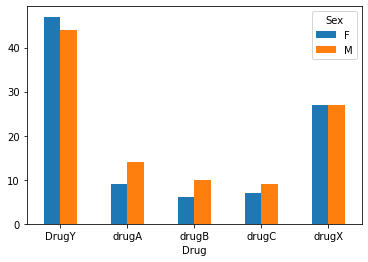

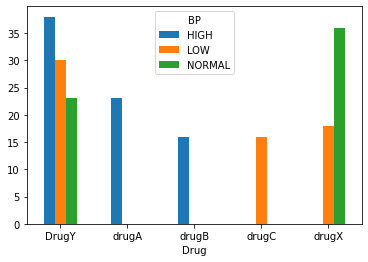

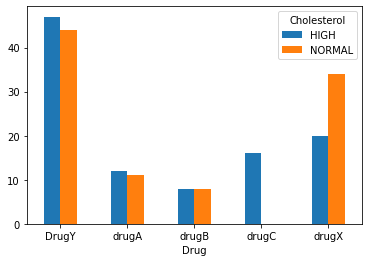

In [20]:
crosstb = pd.crosstab(df.Drug, df.Sex)
crosstb1 = pd.crosstab(df.Drug, df.BP)
crosstb2 = pd.crosstab(df.Drug, df.Cholesterol)
# Creating barplot
barplot = crosstb.plot.bar(rot=0)
barplot1 = crosstb1.plot.bar(rot=0)
barplot2 = crosstb2.plot.bar(rot=0)

<b>Convert String data to numeric

In [149]:
from sklearn.preprocessing import LabelEncoder

lbl = df[['Sex','BP','Cholesterol','Drug']].apply(LabelEncoder().fit_transform)
df = df.drop(['Sex','BP','Cholesterol','Drug'],axis=1)
df = pd.concat([df,lbl],axis=1)

In [150]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ncols = ['Age','Na_to_K']
df[ncols] = ms.fit_transform(df[ncols])

In [120]:
df.head()

,Age,Na_to_K,Sex,BP,Cholesterol,Drug
0,0.135593,0.763846,0,0,0,0
1,0.542373,0.392621,1,1,0,3
2,0.542373,0.251793,1,1,0,3
3,0.220339,0.113213,0,2,0,4
4,0.779661,0.571136,0,1,0,0


<b>Separate input and target

In [151]:
x = df.iloc[:,:-1]
y = df[['Drug']]
y = y.values[:,0] #make 1D array

In [152]:
if x.shape[0] == y.shape[0]:
    print(" Proceed Further")
else:
    print(" Shape doesnot match")

 Proceed Further


<b>Split train and test. The data for test is given 20%.

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [154]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((140, 5), (140,), (60, 5), (60,))

<H1>Implement Random Forest Classifier

In [155]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

<b>Confusion matrix

In [156]:
from sklearn.metrics import confusion_matrix
y_pred = rfc.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[26,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 18]], dtype=int64)

<b>Classification Report

In [157]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



The accuracy score of the model using Random Forest Classifier is 100%.

In [177]:
importance_feature=pd.DataFrame(rfc.feature_importances_,index=x.columns.to_list(),columns=['Importance']).sort_values(by='Importance',ascending=True)
importance_feature

,Importance
Sex,0.017698
Cholesterol,0.050058
Age,0.151717
BP,0.229204
Na_to_K,0.551323


<h1>Logistic Regression Model

In [166]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter = 9999, multi_class='multinomial')

In [167]:
confusion_matrix(y_test, y_pred1)

array([[23,  0,  2,  0,  1],
       [ 0,  7,  0,  0,  0],
       [ 1,  0,  2,  0,  0],
       [ 5,  0,  0,  1,  0],
       [ 1,  0,  0,  0, 17]], dtype=int64)

In [168]:
model.fit(x_train, y_train)
y_pred1 = model.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        26
           1       1.00      1.00      1.00         7
           2       0.50      0.67      0.57         3
           3       1.00      0.17      0.29         6
           4       0.94      0.94      0.94        18

    accuracy                           0.83        60
   macro avg       0.84      0.73      0.72        60
weighted avg       0.86      0.83      0.81        60



Using Logistic Regression model, the accuracy is 83 percent.

<h1>KNN model

In [210]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [211]:
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)

In [212]:
confusion_matrix(y_test, y_pred2)

array([[16,  2,  2,  0,  6],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 5,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 18]], dtype=int64)

In [213]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68        26
           1       0.78      1.00      0.88         7
           2       0.60      1.00      0.75         3
           3       1.00      0.17      0.29         6
           4       0.75      1.00      0.86        18

    accuracy                           0.75        60
   macro avg       0.78      0.76      0.69        60
weighted avg       0.78      0.75      0.72        60



The accuracy using KNN model is 75 percent.

<h1>Cross-validation and Hyper-parameters Tuning

<b>K-Fold Cross-Validation

In [214]:
from sklearn.model_selection import cross_val_score

cv_knn = KNeighborsClassifier(n_neighbors=5)
score_cv = cross_val_score(cv_knn, x, y, cv=5)
print(score_cv)
print('Average score:{}'.format(np.mean(score_cv))) #mean of scores

[0.725 0.7   0.85  0.725 0.825]
Average score:0.765


After cross-validation, we got average score of 76 percent which is more accurate score given by model before.

<b>Hyper-parameter tuning

In [222]:
from sklearn.model_selection import GridSearchCV
# new knn model
knn2 = KNeighborsClassifier()
# dictionary for testing value of n_neighbours
param_grid = {'n_neighbors': np.arange(1, 11)}
#use gridsearch to test all values for n_neighbors
knn_Grid = GridSearchCV(knn2, param_grid, cv=5)

knn_Grid.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [223]:
# check which n_neighbour gives best accuracy
knn_Grid.best_params_

{'n_neighbors': 1}

In [224]:
knn_Grid.best_score_

0.9

In [226]:
# rebuild moddel with result n neighbour from cross validation.
knn_ = KNeighborsClassifier(n_neighbors=1)
knn_.fit(x_train,y_train)
pred = knn_.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        26
           1       1.00      0.86      0.92         7
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         6
           4       1.00      0.89      0.94        18

    accuracy                           0.92        60
   macro avg       0.90      0.93      0.90        60
weighted avg       0.93      0.92      0.92        60



<h1>Feature Selection

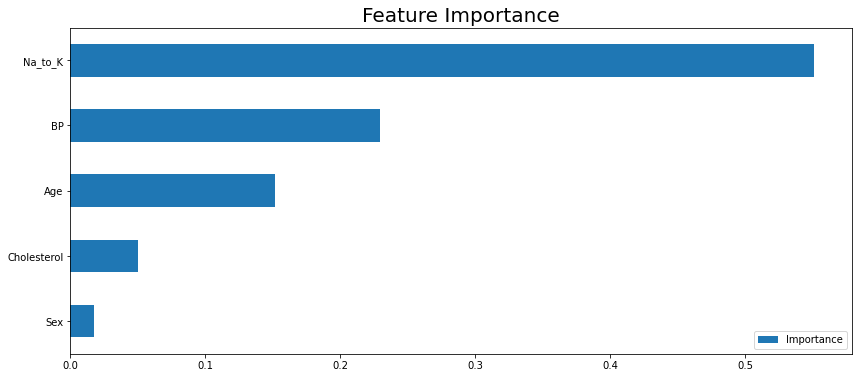

In [233]:
importance_feature.plot(kind='barh',figsize=(14,6));
plt.title("Feature Importance",fontsize=20);

In [227]:
feature = x
target = y

In [230]:
from sklearn.linear_model import LassoCV

model = LassoCV()
model.fit(feature, target)
print("Best alpha using built-in LassoCV: %f" % model.alpha_)
print("Best score using built-in LassoCV: %f" %model.score(features,target))
coef = pd.Series(model.coef_, index = features.columns)

Best alpha using built-in LassoCV: 0.008343
Best score using built-in LassoCV: -45.658126


In [231]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

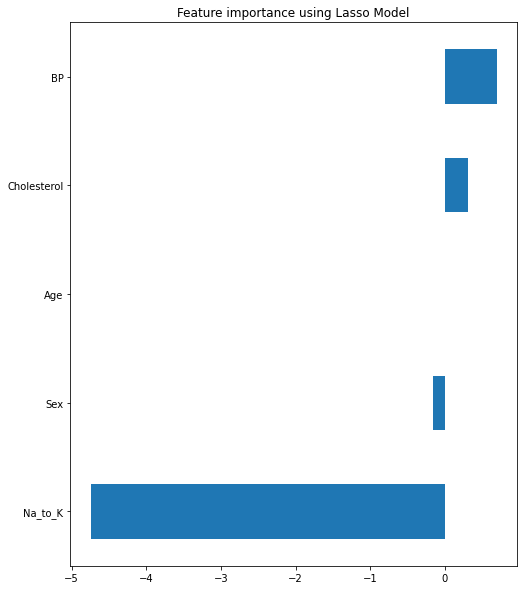

In [232]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Using LassoCV, it gives selected features. Age column is eliminated by Lasso.

<h1>Model Rebuild

Now, new model will be build using results from cross-validation hypertuning and feature selection. 

In [253]:
selected_x = feature[["BP","Cholesterol","Sex","Na_to_K"]]
selected_x.head()

,BP,Cholesterol,Sex,Na_to_K
0,0,0,0,0.596848
1,1,0,1,0.213397
2,1,0,1,0.120239
3,2,0,0,0.047814
4,1,0,0,0.368191


In [245]:
# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(selected_x,y,test_size=0.2,random_state=42)

In [246]:
# check shape
if selected_x.shape[0] == y.shape[0]:
    print(" Proceed Further")
else:
    print(" Shape doesnot match")

 Proceed Further


In [247]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # n_neighbour '1' gives best accuracy from cross validation

In [248]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [249]:
Y_Pred = knn.predict(X_test)

<b>Classification report after model rebuild

In [250]:
print(classification_report(Y_Pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       0.82      1.00      0.90         9

    accuracy                           0.93        40
   macro avg       0.93      0.97      0.94        40
weighted avg       0.94      0.93      0.93        40



<h1>Conclusion

Different models have given various accuracy.First Random forest classifier model is used which has 100 percent accuracy. The accuracy of Logistic Regression model is 83 percent. Accuracy of KNN model is 75. Cross validation for hyper-parameter is done for knn model. Hyperparameter of knn is 'n_neighbors'. From cross validation, 'n_neighbour=1' results best accuracy. We implement the hyperparameter and the model gave accuracy of 92 percent. Lastly, feature extraction was done from which one column 'Sex' is eliminated. The last rebuild model with feature extraction accuracy result was better. It has accuracy of 93 percent.